<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%20%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%962(%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання №1

Крок 1: Завантажуємо бібліотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Крок 2: Вибираємо країну з Вікіпедії


In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)

# Перевіримо скільки таблиць
print(f"Кількість таблиць на сторінці: {len(tables)}")

# Вибираємо таблицю з країнами
gdp_df = tables[2]
gdp_df.head()

Кількість таблиць на сторінці: 7


Country/Territory IMF[1][12]            World Bank[13]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  115494312       2025      105435540       2023   
1     United States   30338000       2025       27360935       2023   
2             China   19535000  [n 1]2025       17794782  [n 3]2023   
3           Germany    4922000       2025        4456081       2023   
4             Japan    4390000       2025        4212945       2023   

  United Nations[14]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

Крок 3: Перейменування колонок для кращого розуміння даних


In [ ]:
# Перевіримо назви колонок перед перейменуванням
print("Початкові назви колонок:")
print(gdp_df.columns)

# Беремо перші 4 колонки і перейменовуємо їх вручну
gdp_df = gdp_df.iloc[:, :4]
gdp_df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

# Перевіримо результат
gdp_df.head()


Початкові назви колонок:
MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][12]',          'Forecast'),
            (        'IMF[1][12]',              'Year'),
            (    'World Bank[13]',          'Estimate'),
            (    'World Bank[13]',              'Year'),
            ('United Nations[14]',          'Estimate'),
            ('United Nations[14]',              'Year')],
           )


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,115494312,2025,105435540
1,United States,30338000,2025,27360935
2,China,19535000,[n 1]2025,17794782
3,Germany,4922000,2025,4456081
4,Japan,4390000,2025,4212945


Крок 4: Робимо очистку даних



In [ ]:
# Заміна '—' на NaN
gdp_df.replace('—', np.nan, inplace=True)

# Видаляємо $, коми і конвертуємо в числа
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    gdp_df[col] = gdp_df[col].replace('[\$,]', '', regex=True).str.replace(',', '')
    gdp_df[col] = pd.to_numeric(gdp_df[col], errors='coerce')

<ipython-input-7-7bfe0ad283d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df.replace('—', np.nan, inplace=True)
<ipython-input-7-7bfe0ad283d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df[col] = gdp_df[col].replace('[\$,]', '', regex=True).str.replace(',', '')
<ipython-input-7-7bfe0ad283d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Крок 5: Обробка пропусків  

In [ ]:
# Заповнюємо пропуски середніми значеннями
gdp_df.fillna(gdp_df.mean(numeric_only=True), inplace=True)

# Видаляємо дублікати
gdp_df.drop_duplicates(inplace=True)

<ipython-input-8-63692d0d69c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df.fillna(gdp_df.mean(numeric_only=True), inplace=True)
<ipython-input-8-63692d0d69c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df.drop_duplicates(inplace=True)


Крок 6: Статистика

In [ ]:
print(gdp_df.dtypes)
print(gdp_df.describe())

Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object
           MVF_2024  WorldBank_2023      OON_2022
count  2.100000e+02      210.000000  2.100000e+02
mean   1.190513e+06     2024.387097  1.037205e+06
std    8.330830e+06        0.489747  7.602076e+06
min    6.600000e+01     2022.000000  6.200000e+01
25%    1.526775e+04     2024.000000  1.044175e+04
50%    5.993550e+04     2024.000000  4.341600e+04
75%    4.730000e+05     2025.000000  3.376592e+05
max    1.154943e+08     2025.000000  1.054355e+08


 Крок 7: Відхилення між MVF_2024 та WorldBank_2023

In [ ]:
gdp_df['Diff_MVF_WB'] = abs(gdp_df['MVF_2024'] - gdp_df['WorldBank_2023'])

# Найбільші відхилення
gdp_df.sort_values('Diff_MVF_WB', ascending=False).head()

<ipython-input-10-bab6758b84a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_df['Diff_MVF_WB'] = abs(gdp_df['MVF_2024'] - gdp_df['WorldBank_2023'])


,Country,MVF_2024,WorldBank_2023,OON_2022,Diff_MVF_WB
0,World,115494312.0,2025.000000,105435540.0,1.154923e+08
1,United States,30338000.0,2025.000000,27360935.0,3.033598e+07
2,China,19535000.0,2024.387097,17794782.0,1.953298e+07
3,Germany,4922000.0,2025.000000,4456081.0,4.919975e+06
4,Japan,4390000.0,2025.000000,4212945.0,4.387975e+06


 Крок 8: Фільтруємо дані для Куби

In [ ]:
cuba = gdp_df[gdp_df['Country'] == 'Cuba']
print("Дані для Куби:")
print(cuba[['MVF_2024', 'WorldBank_2023', 'OON_2022']])

Дані для Куби:
        MVF_2024  WorldBank_2023      OON_2022
63  1.190513e+06     2024.387097  1.037205e+06


Крок 9: Візуалізація даних Куби

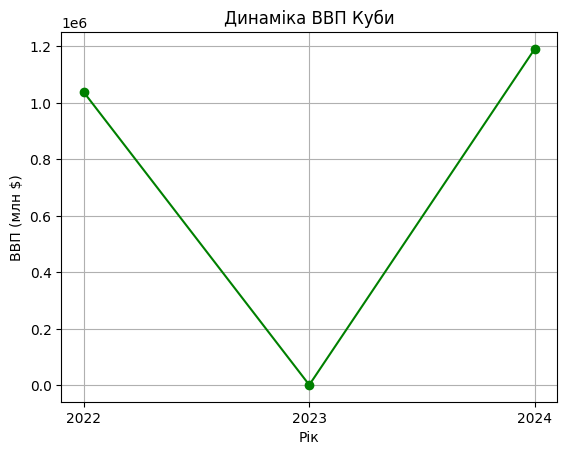

In [ ]:
plt.plot(['2022', '2023', '2024'],
         [cuba['OON_2022'].values[0], cuba['WorldBank_2023'].values[0], cuba['MVF_2024'].values[0]],
         marker='o', linestyle='-', color='green')

plt.title('Динаміка ВВП Куби')
plt.xlabel('Рік')
plt.ylabel('ВВП (млн $)')
plt.grid(True)
plt.show()

Крок 10: Частка Куби у світовому ВВП

In [ ]:
for col in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    total = gdp_df[col].sum()
    share = cuba[col].values[0] / total
    print(f"Частка Куби у {col}: {share:.4%}")


Частка Куби у MVF_2024: 0.4762%
Частка Куби у WorldBank_2023: 0.4762%
Частка Куби у OON_2022: 0.4762%
